In [1]:
!pip install scikit-learn-intelex

In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
!pip install pandas numpy seaborn gradio 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data= pd.read_csv("expediture.csv")
data

,Date,Boys_hostel,Girls_hostel,Total_strength,Income,Catering,Rice,Milk,Egg,Vegetables,...,Eb_Bill,Water,Internet,House_keeping,Drainage_clean,Journal,Security_salary,Generator,General,Total_expenditure
0,2018-01-05,287,130,417,11970000,201837,109153,145229,29524,173143,...,218750,12562,14926,56852,30518,1444,82188,9421,708851,2179807
1,2018-02-05,283,133,416,12480000,208514,119317,148757,27494,170955,...,218572,13248,12585,56506,31300,1498,81143,9464,699773,2157307
2,2018-03-05,282,136,418,12540000,205136,116949,130057,29385,173713,...,216399,13078,13977,58623,32565,1487,81173,9401,702161,2155849
3,2018-04-05,295,148,443,13290000,204487,116783,149784,29252,170558,...,216547,11878,15843,56161,32863,1412,82944,9367,710525,2164511
4,2018-05-05,286,141,427,12810000,205260,116900,138425,28300,168461,...,218394,13009,14230,55675,30508,1452,81622,9223,699979,2135573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08-05,281,148,429,12870000,207540,109933,133654,27910,168247,...,218872,10430,12349,55784,33597,1473,81860,9323,704877,2168925
68,2023-09-05,289,146,435,13050000,200160,113223,144890,29174,169876,...,216909,12952,14470,59143,32984,1489,82511,9264,709972,2167414
69,2023-10-05,285,125,410,12300000,203187,114282,140443,29632,168914,...,219336,10189,13164,57104,34670,1450,81500,9250,708563,2186462
70,2023-11-05,270,129,399,11970000,206910,107217,143150,28096,170511,...,217573,10659,13395,59008,30733,1473,82095,9402,708486,2134644


In [6]:
import csv

def get_attributes_from_csv(file_path):
    attributes = []

    with open(file_path, 'r', newline='') as csvfile:
        # Create a CSV reader
        csv_reader = csv.reader(csvfile)

        # Read the header row to get attribute names
        header = next(csv_reader)

        # Assuming the first row contains attribute names
        attributes = header

        # You can iterate over the remaining rows to get attribute values
        for row in csv_reader:
          return attributes

# Example usage
csv_file_path = 'expediture.csv'
attributes = get_attributes_from_csv(csv_file_path)
print("Attributes:", attributes)

Attributes: ['Date', 'Boys_hostel', 'Girls_hostel', 'Total_strength', 'Income', 'Catering', 'Rice', 'Milk', 'Egg', 'Vegetables', 'Chicken', 'Groceries', 'Coconut', 'Diesel', 'Gas', 'Mess_exp', 'Staffs_salary', 'Electric_work', 'Eb_Bill', 'Water', 'Internet', 'House_keeping', 'Drainage_clean', 'Journal', 'Security_salary', 'Generator', 'General', 'Total_expenditure']


Text(0.5, 1.0, '')

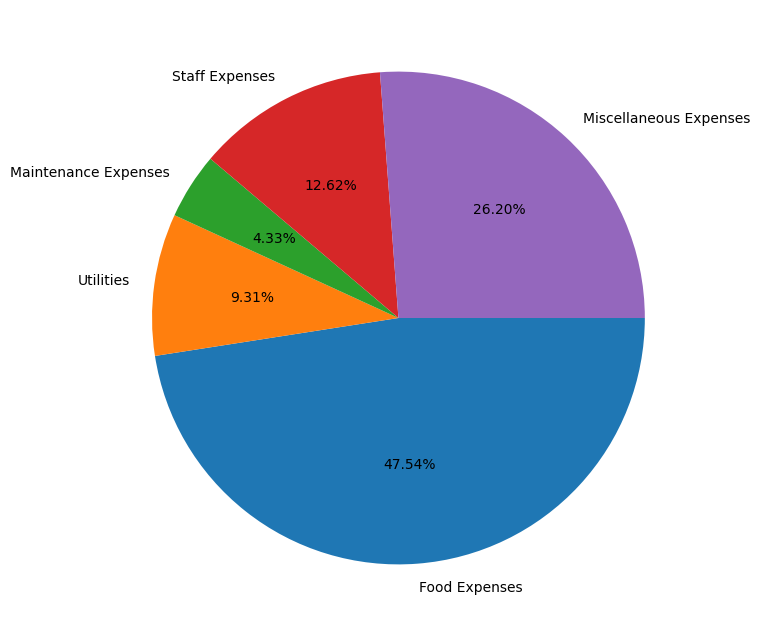

In [7]:
plt.figure(figsize=(15,8))
Cateries=['Food Expenses','Utilities','Maintenance Expenses','Staff Expenses','Miscellaneous Expenses']
Values=['1272651','249288','116040','337830','701271']
plt.pie(Values,labels=Cateries,autopct='%.2f%%',counterclock=False)
plt.title("")

In [8]:
data.dropna(inplace=True)

In [9]:
from sklearn.model_selection import train_test_split
x=data.drop(['Total_expenditure'],axis=1)
y=data['Total_expenditure']

In [10]:
x

,Date,Boys_hostel,Girls_hostel,Total_strength,Income,Catering,Rice,Milk,Egg,Vegetables,...,Electric_work,Eb_Bill,Water,Internet,House_keeping,Drainage_clean,Journal,Security_salary,Generator,General
0,2018-01-05,287,130,417,11970000,201837,109153,145229,29524,173143,...,18899,218750,12562,14926,56852,30518,1444,82188,9421,708851
1,2018-02-05,283,133,416,12480000,208514,119317,148757,27494,170955,...,18770,218572,13248,12585,56506,31300,1498,81143,9464,699773
2,2018-03-05,282,136,418,12540000,205136,116949,130057,29385,173713,...,16351,216399,13078,13977,58623,32565,1487,81173,9401,702161
3,2018-04-05,295,148,443,13290000,204487,116783,149784,29252,170558,...,18702,216547,11878,15843,56161,32863,1412,82944,9367,710525
4,2018-05-05,286,141,427,12810000,205260,116900,138425,28300,168461,...,16197,218394,13009,14230,55675,30508,1452,81622,9223,699979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-08-05,281,148,429,12870000,207540,109933,133654,27910,168247,...,17130,218872,10430,12349,55784,33597,1473,81860,9323,704877
68,2023-09-05,289,146,435,13050000,200160,113223,144890,29174,169876,...,16499,216909,12952,14470,59143,32984,1489,82511,9264,709972
69,2023-10-05,285,125,410,12300000,203187,114282,140443,29632,168914,...,19807,219336,10189,13164,57104,34670,1450,81500,9250,708563
70,2023-11-05,270,129,399,11970000,206910,107217,143150,28096,170511,...,19426,217573,10659,13395,59008,30733,1473,82095,9402,708486


In [11]:
y

0     2179807
1     2157307
2     2155849
3     2164511
4     2135573
       ...   
67    2168925
68    2167414
69    2186462
70    2134644
71    2131193
Name: Total_expenditure, Length: 72, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
train_data=x_train.join(y_train)

In [14]:
train_data

,Date,Boys_hostel,Girls_hostel,Total_strength,Income,Catering,Rice,Milk,Egg,Vegetables,...,Eb_Bill,Water,Internet,House_keeping,Drainage_clean,Journal,Security_salary,Generator,General,Total_expenditure
55,2022-08-05,286,133,419,12570000,203331,117735,138914,28226,168648,...,217034,10949,12538,57111,32544,1444,82472,9482,702297,2169659
70,2023-11-05,270,129,399,11970000,206910,107217,143150,28096,170511,...,217573,10659,13395,59008,30733,1473,82095,9402,708486,2134644
62,2023-03-05,284,138,422,12660000,204971,103951,149358,27653,174895,...,217150,12677,13099,56091,30193,1497,82329,9240,697062,2164260
43,2021-08-05,299,143,442,13260000,201029,111036,132467,27624,174488,...,216828,12478,12369,55750,33577,1423,81430,9304,702560,2130949
4,2018-05-05,286,141,427,12810000,205260,116900,138425,28300,168461,...,218394,13009,14230,55675,30508,1452,81622,9223,699979,2135573
65,2023-06-05,295,134,429,12870000,204128,109120,147573,29978,171648,...,218796,12841,13341,59025,34334,1496,82356,9389,714835,2163204
50,2022-03-05,271,128,399,11970000,202688,108062,137271,28715,169682,...,218016,10215,15508,59550,34357,1436,81881,9406,702256,2149824
2,2018-03-05,282,136,418,12540000,205136,116949,130057,29385,173713,...,216399,13078,13977,58623,32565,1487,81173,9401,702161,2155849
40,2021-05-05,298,145,443,13290000,205355,110321,134204,28733,173174,...,217016,11119,12183,55054,30843,1414,82804,9378,698224,2157471
11,2018-12-05,289,128,417,12510000,204621,110424,145399,29240,172943,...,219543,14742,12494,55686,30426,1410,81687,9483,700267,2146952


In [15]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [16]:
from datetime import datetime
x_test['Date'] = x_test['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp()).values.reshape(-1, 1)
y_test=data['Total_expenditure'].values

array([[<Axes: title={'center': 'Boys_hostel'}>,
        <Axes: title={'center': 'Girls_hostel'}>,
        <Axes: title={'center': 'Total_strength'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Catering'}>],
       [<Axes: title={'center': 'Rice'}>,
        <Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Egg'}>,
        <Axes: title={'center': 'Vegetables'}>,
        <Axes: title={'center': 'Chicken'}>],
       [<Axes: title={'center': 'Groceries'}>,
        <Axes: title={'center': 'Coconut'}>,
        <Axes: title={'center': 'Diesel'}>,
        <Axes: title={'center': 'Gas'}>,
        <Axes: title={'center': 'Mess_exp'}>],
       [<Axes: title={'center': 'Staffs_salary'}>,
        <Axes: title={'center': 'Electric_work'}>,
        <Axes: title={'center': 'Eb_Bill'}>,
        <Axes: title={'center': 'Water'}>,
        <Axes: title={'center': 'Internet'}>],
       [<Axes: title={'center': 'House_keeping'}>,
        <Axes: title={'cent

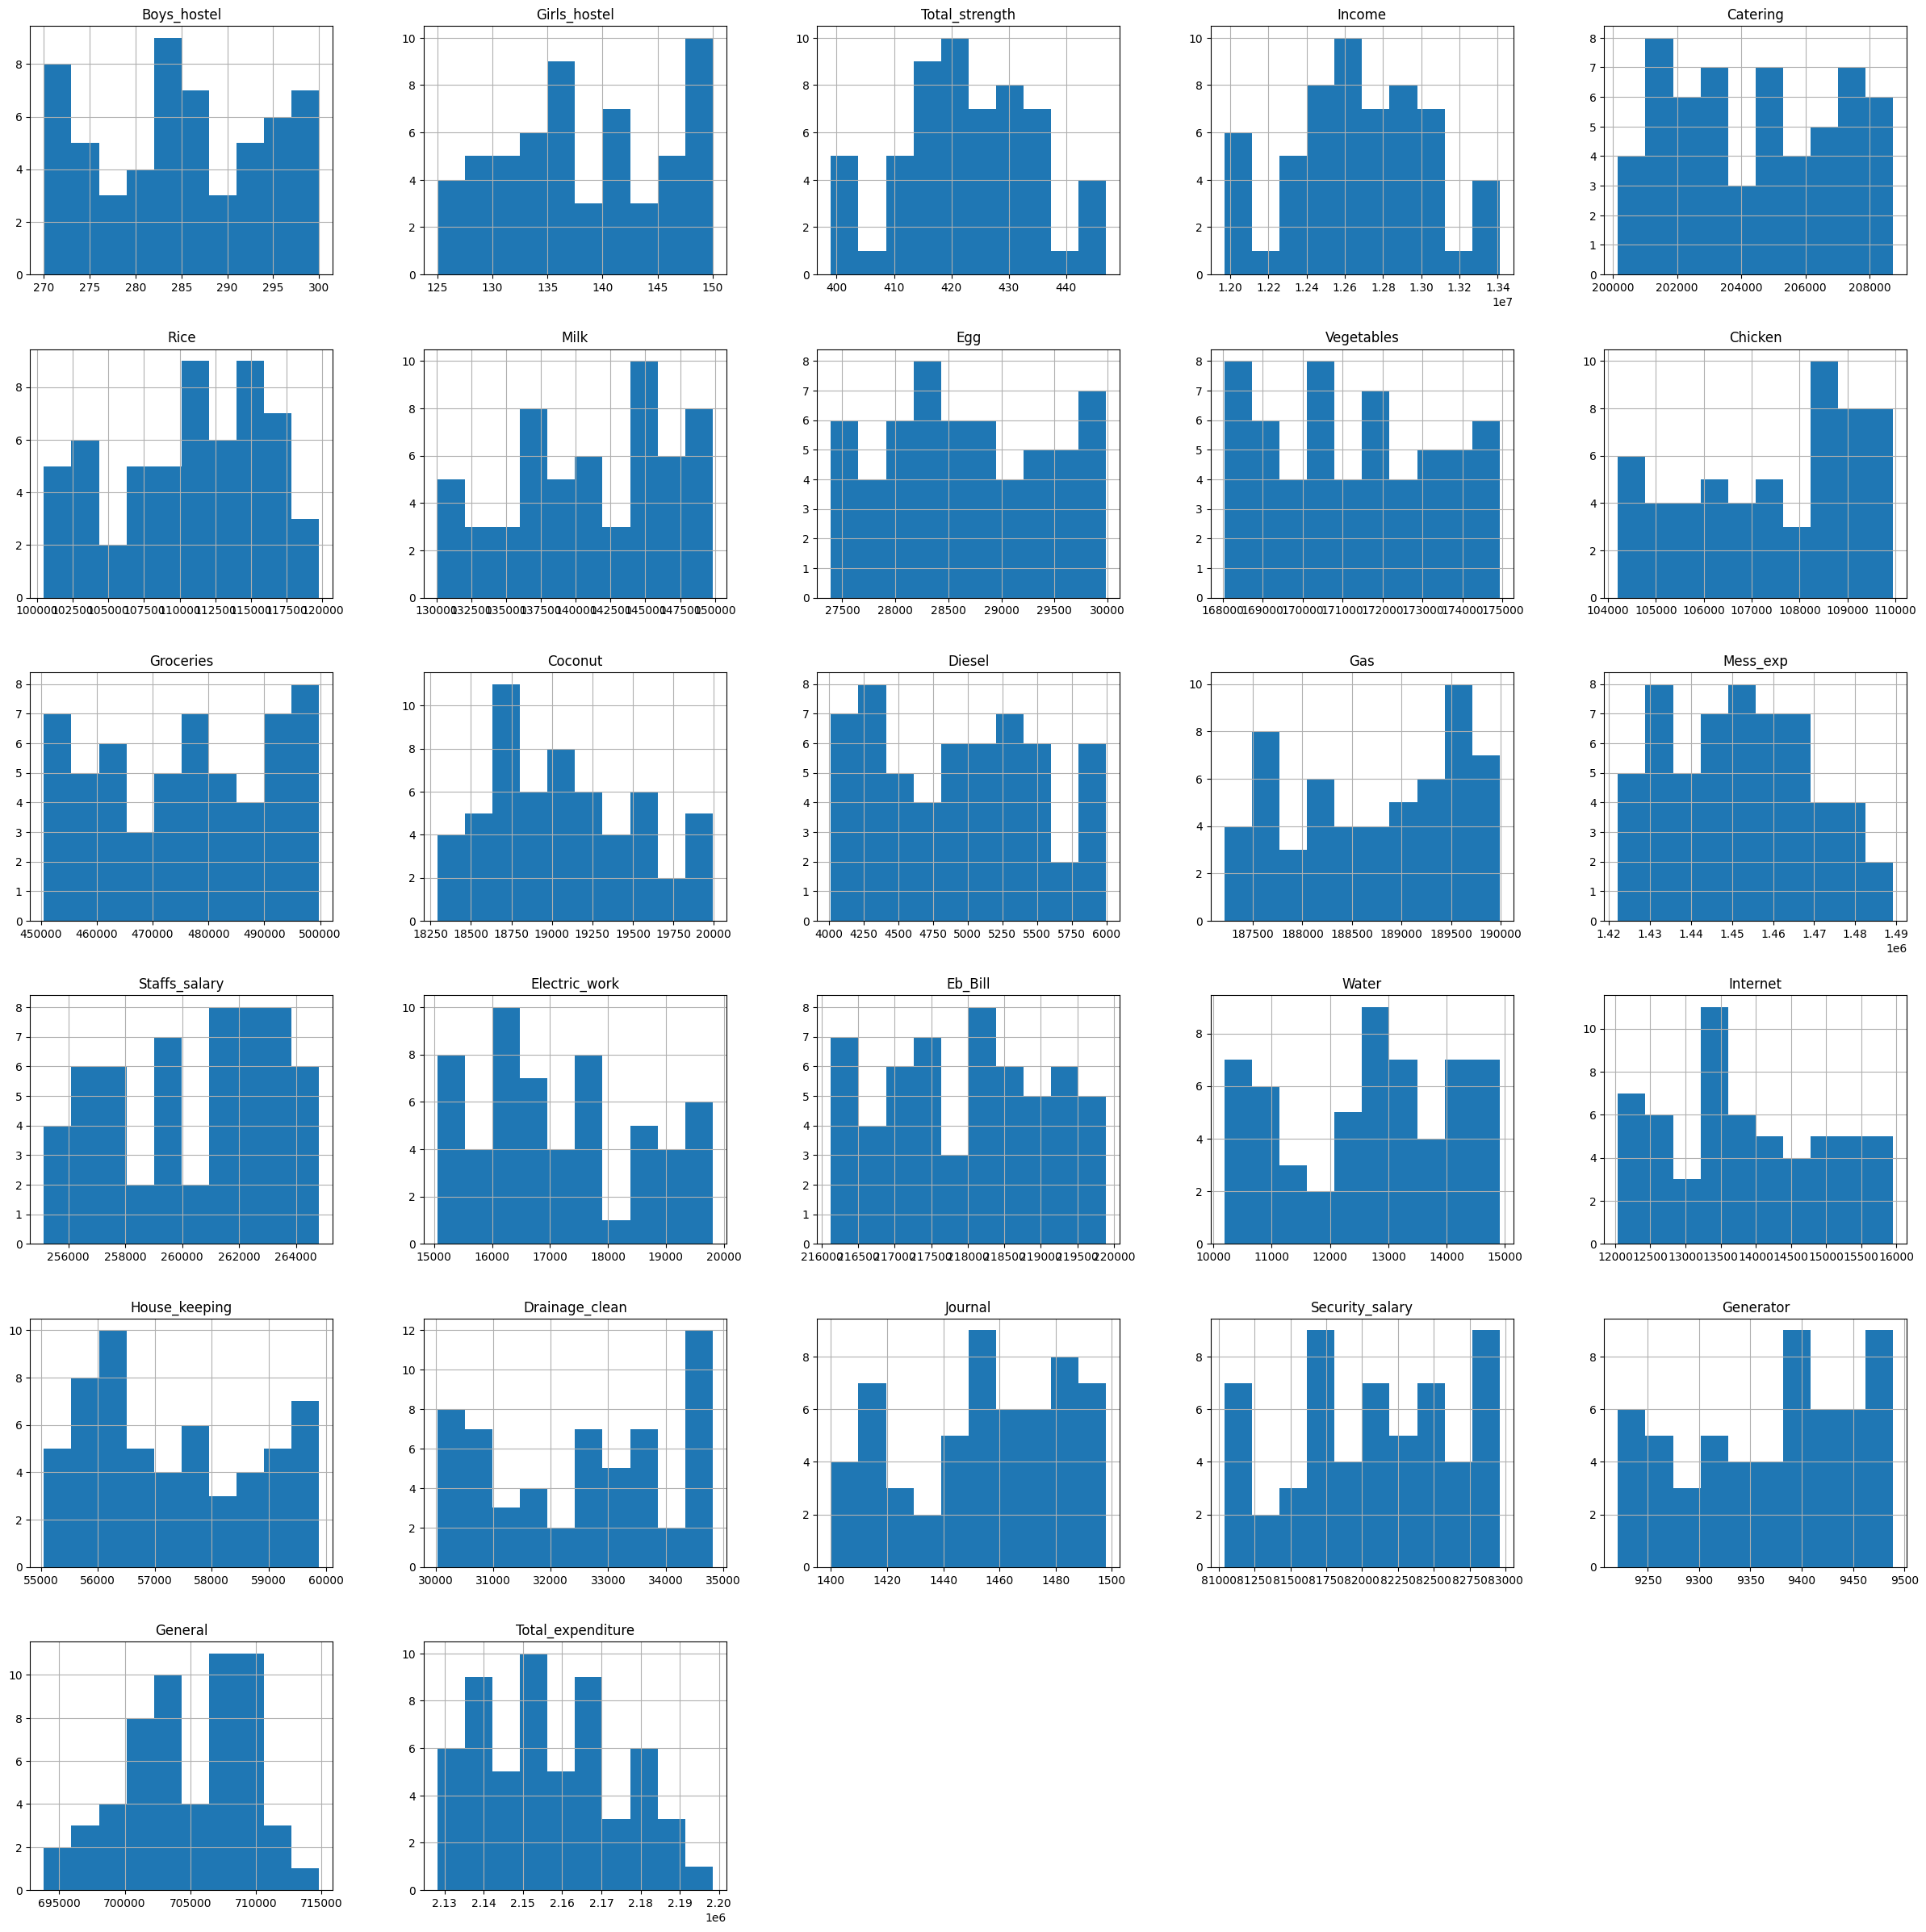

In [17]:
train_data.hist(figsize=(30,30))

<Axes: xlabel='Total_strength', ylabel='Income'>

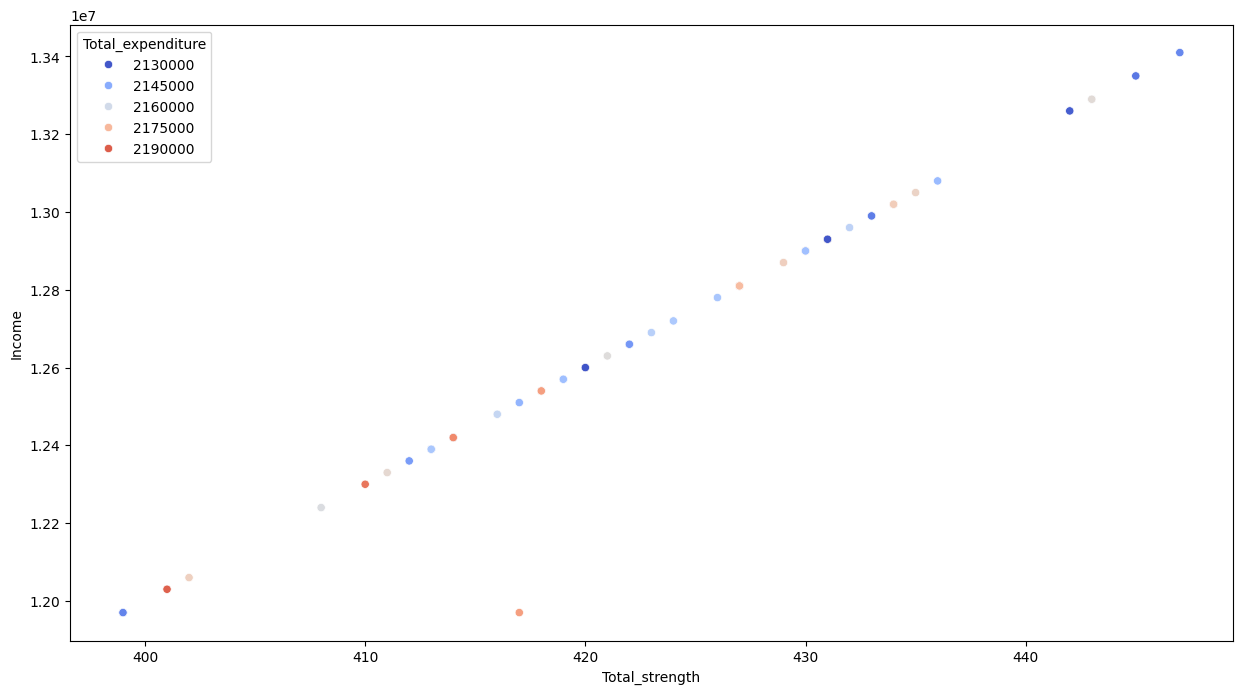

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Total_strength",y="Income",data=train_data,hue="Total_expenditure",palette="coolwarm")

In [19]:
x_train = data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp()).values.reshape(-1, 1)
y_train = data['Total_expenditure'].values

In [20]:
x_test

,Date,Boys_hostel,Girls_hostel,Total_strength,Income,Catering,Rice,Milk,Egg,Vegetables,...,Electric_work,Eb_Bill,Water,Internet,House_keeping,Drainage_clean,Journal,Security_salary,Generator,General
26,1.583347e+09,279,138,417,12510000,208684,104350,142594,28794,173685,...,16314,219693,11471,12083,56202,30045,1438,82105,9362,699352
27,1.586025e+09,288,129,417,12510000,203396,109879,146277,29928,170778,...,15828,218023,11170,14491,57013,32909,1466,81883,9494,701510
48,1.641321e+09,299,126,425,12750000,204285,103293,143510,29390,168008,...,19031,219412,11854,14080,58866,34728,1495,82130,9481,714855
22,1.572892e+09,275,126,401,12030000,207644,114334,131627,28113,169593,...,16440,217248,11552,15451,58962,31204,1432,81161,9389,704226
30,1.593887e+09,273,129,402,12060000,200737,107086,146541,29875,169963,...,18617,217910,10486,15391,56872,34047,1459,81688,9354,708968
51,1.649097e+09,284,140,424,12720000,208241,102139,130707,28068,171834,...,15777,218181,13509,13602,59877,31706,1478,82610,9303,707799
7,1.533407e+09,287,127,414,12420000,206365,115240,132725,29403,173036,...,19788,216075,10247,14742,55227,32169,1489,82770,9213,698413
59,1.670179e+09,274,137,411,12330000,208456,107180,143642,27533,173777,...,15365,216808,11191,15331,55357,31652,1486,81199,9370,700707
34,1.604515e+09,280,140,420,12600000,209875,111501,143993,28989,171962,...,15733,216412,12834,14915,56947,34952,1462,81326,9342,706045
71,1.701715e+09,285,147,432,12960000,205054,113089,134113,27692,168535,...,18169,218120,11413,13906,59412,31416,1472,81683,9318,707165


In [21]:
y_test

array([2179807, 2157307, 2155849, 2164511, 2135573, 2137471, 2135378,
       2123859, 2128640, 2174043, 2146117, 2146952, 2149690, 2183615,
       2198360, 2148231, 2168528, 2179957, 2162623, 2155710, 2163788,
       2138262, 2156068, 2140999, 2181884, 2151230, 2156622, 2145411,
       2128827, 2154239, 2132670, 2139310, 2148577, 2181163, 2180804,
       2179740, 2151632, 2165572, 2152154, 2136293, 2157471, 2140405,
       2162657, 2130949, 2169622, 2128198, 2129867, 2149440, 2164491,
       2154594, 2149824, 2138300, 2189560, 2170655, 2141666, 2169659,
       2157714, 2141646, 2146821, 2154654, 2161524, 2183478, 2164260,
       2129842, 2189369, 2163204, 2175055, 2168925, 2167414, 2186462,
       2134644, 2131193], dtype=int64)

In [22]:
x_train

array([[1.5150906e+09],
       [1.5177690e+09],
       [1.5201882e+09],
       [1.5228666e+09],
       [1.5254586e+09],
       [1.5281370e+09],
       [1.5307290e+09],
       [1.5334074e+09],
       [1.5360858e+09],
       [1.5386778e+09],
       [1.5413562e+09],
       [1.5439482e+09],
       [1.5466266e+09],
       [1.5493050e+09],
       [1.5517242e+09],
       [1.5544026e+09],
       [1.5569946e+09],
       [1.5596730e+09],
       [1.5622650e+09],
       [1.5649434e+09],
       [1.5676218e+09],
       [1.5702138e+09],
       [1.5728922e+09],
       [1.5754842e+09],
       [1.5781626e+09],
       [1.5808410e+09],
       [1.5833466e+09],
       [1.5860250e+09],
       [1.5886170e+09],
       [1.5912954e+09],
       [1.5938874e+09],
       [1.5965658e+09],
       [1.5992442e+09],
       [1.6018362e+09],
       [1.6045146e+09],
       [1.6071066e+09],
       [1.6097850e+09],
       [1.6124634e+09],
       [1.6148826e+09],
       [1.6175610e+09],
       [1.6201530e+09],
       [1.622831

In [23]:
y_train

array([2179807, 2157307, 2155849, 2164511, 2135573, 2137471, 2135378,
       2123859, 2128640, 2174043, 2146117, 2146952, 2149690, 2183615,
       2198360, 2148231, 2168528, 2179957, 2162623, 2155710, 2163788,
       2138262, 2156068, 2140999, 2181884, 2151230, 2156622, 2145411,
       2128827, 2154239, 2132670, 2139310, 2148577, 2181163, 2180804,
       2179740, 2151632, 2165572, 2152154, 2136293, 2157471, 2140405,
       2162657, 2130949, 2169622, 2128198, 2129867, 2149440, 2164491,
       2154594, 2149824, 2138300, 2189560, 2170655, 2141666, 2169659,
       2157714, 2141646, 2146821, 2154654, 2161524, 2183478, 2164260,
       2129842, 2189369, 2163204, 2175055, 2168925, 2167414, 2186462,
       2134644, 2131193], dtype=int64)

In [24]:
x_test = data[['Total_expenditure']]

In [25]:
from sklearnex.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_predict=reg.predict(x_test)
y_predict[20]

C:\Users\Dharanidharan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


2110969.434004715

In [26]:
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor()
reg1.fit(x_train, y_train)

DecisionTreeRegressor()

In [27]:
y_predict1=reg1.predict(x_test)
y_predict1[20]

C:\Users\Dharanidharan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


2179807.0

In [28]:
y_predict[20]

2110969.434004715

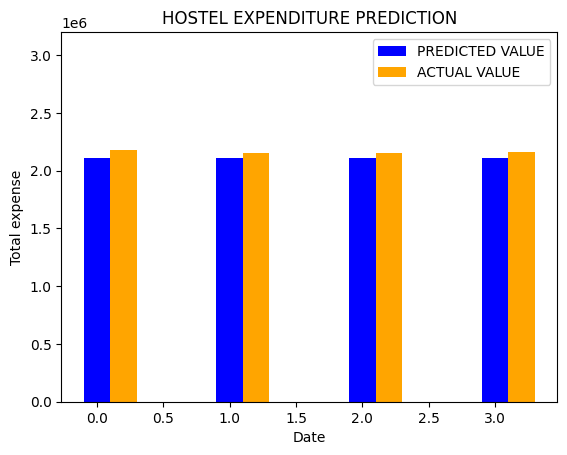

In [29]:
plt.bar(range(4), y_predict[:4], width=0.2, label="PREDICTED VALUE", color='blue') #right sfted value by 2.0
plt.bar([i + 0.2 for i in range(4)], y_test[:4], width=0.2, label="ACTUAL VALUE", color='orange') #left shifted value by 2.0

plt.title("HOSTEL EXPENDITURE PREDICTION")
plt.xlabel("Date")
plt.ylabel("Total expense")
plt.legend(loc='upper right')
plt.ylim(0, 3200000)
plt.show()

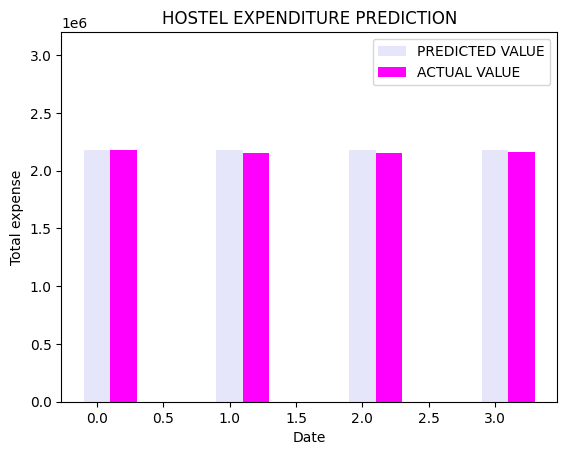

In [30]:
plt.bar(range(4), y_predict1[:4], width=0.2, label="PREDICTED VALUE", color='lavender') #right sfted value by 2.0
plt.bar([i + 0.2 for i in range(4)], y_test[:4], width=0.2, label="ACTUAL VALUE", color='magenta') #left shifted value by 2.0

plt.title("HOSTEL EXPENDITURE PREDICTION")
plt.xlabel("Date")
plt.ylabel("Total expense")
plt.legend(loc='upper right')
plt.ylim(0, 3200000)
plt.show()

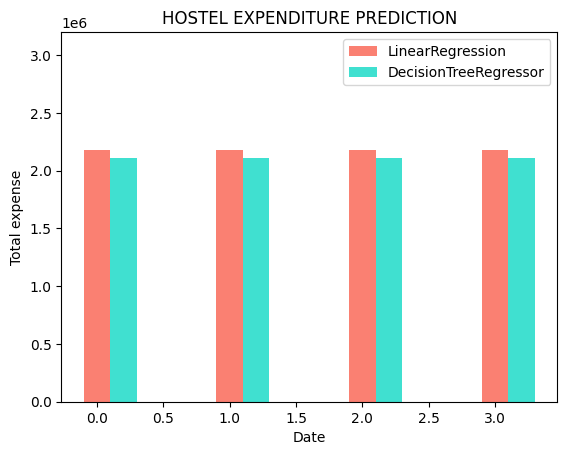

In [31]:
plt.bar(range(4), y_predict1[:4], width=0.2, label="LinearRegression", color='salmon') #right sfted value by 2.0
plt.bar([i + 0.2 for i in range(4)], y_predict[:4], width=0.2, label="DecisionTreeRegressor", color='turquoise') #left shifted value by 2.0

plt.title("HOSTEL EXPENDITURE PREDICTION")
plt.xlabel("Date")
plt.ylabel("Total expense")
plt.legend(loc='upper right')
plt.ylim(0, 3200000)
plt.show()

In [32]:
!pip install gradio

In [34]:
from datetime import datetime
import numpy as np
import gradio as gr

coefficients = {
    'Catering': 0.2,
    'Rice': 0.15,
    'Milk': 0.1,
    'EGG': 0.1,
    'Veg': 0.1,
    'Chicken': 0.1,
    'Groceries': 0.05,
    'Coconut': 0.03,
    'Disel': 0.02,
    'Gas': 0.02,
    'Salary(Staff)': 0.05,
    'Electric work': 0.03,
    'Eb Bill': 0.02,
    'Water': 0.02,
    'Internet': 0.01,
    'Sanitary': 0.01,
    'Drainage clean': 0.01,
    'Journal': 0.01,
    'Security Salary': 0.02,
    'Generator': 0.02,
    'General': 0.02
}

def calculate_individual_expenditures(total_predicted_expenditure):
    individual_expenditures = {}
    for attribute, coefficient in coefficients.items():
        individual_expenditures[attribute] = coefficient * total_predicted_expenditure
    return individual_expenditures

def convert_to_timestamp(date_string):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    return np.array([[date.timestamp()]])  # Convert to timestamp and reshape

def predict_and_calculate_expenditure(date):
    input_timestamp = convert_to_timestamp(date)
    predicted_expenditure = reg.predict(input_timestamp)  # Assuming `reg` is your regression model
    total_predicted_expenditure = predicted_expenditure[0]
    individual_expenditures = calculate_individual_expenditures(total_predicted_expenditure)
    return {'Total Predicted Expenditure': total_predicted_expenditure, 'Individual Expenditures': individual_expenditures}


# Create a Gradio interface

interface = gr.Interface(fn=predict_and_calculate_expenditure, inputs="text", outputs="json", title="Expenditure Prediction", description="Enter the date (YYYY-MM-DD) to predict expenditure and calculate individual expenditures.")
interface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


C:\Users\Dharanidharan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\daal4py\sklearn\_utils.py:371: UserWarning: 'Threading' parallel backend is not supported by Intel(R) Extension for Scikit-learn*. Falling back to usage of all available threads.
  warn(
C:\Users\Dharanidharan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\daal4py\sklearn\_utils.py:371: UserWarning: 'Threading' parallel backend is not supported by Intel(R) Extension for Scikit-learn*. Falling back to usage of all available threads.
  warn(
